#Gold vs Jobs: What the Data Reveals
###**Zeynep Deniz**
---



#🔍 Introduction
The dynamic relationship between the US stock market and the unemployment rate has long intrigued economists, analysts, and investors alike. Do rising stock prices signal a healthy labor market? Or does increasing unemployment drag down investor confidence?

In this project, we dive into historical datasets to explore whether there is a statistically significant correlation between US stock market performance and national unemployment rates. By combining data analysis, visualization, and econometric modeling, we aim to uncover hidden trends and better understand how these two crucial indicators interact over time.

We'll walk through:

-Loading and visualizing both datasets,

-Exploring trends and seasonality,

-Conducting correlation and regression analysis,

-Drawing insights that may challenge or confirm conventional beliefs.

Let’s uncover whether Wall Street and Main Street truly move together—or not.



In [93]:
import numpy as np
import pandas as pd
from os.path import join
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [94]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
path_prefix = "/content/drive/My Drive/dataset"

Mounted at /content/drive


# Datasets

#📊 First Dataset
This dataset contains daily price and volume data for various US market assets such as natural gas, crude oil, copper, Bitcoin, and gold.

Data source is available here 👉 [**US Stock Market and Commodities Data (2020–2024)**](https://www.kaggle.com/code/mahmoudredagamail/us-stock-market-and-commodities-data-2020-2024)  
For this project, we will specifically focus on gold prices, as they will serve as a key financial indicator in our correlation analysis with unemployment rates.

In [112]:
filename= "Stock_Market_Dataset[1].csv"
df_gold_price = pd.read_csv(join(path_prefix, filename))

In [113]:
df_gold_price.head()

,Unnamed: 0,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,0,02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,1,01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2,31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,3,30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,4,29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [114]:
df_gold_price['Date'] = pd.to_datetime(df_gold_price['Date'], format='%d-%m-%Y')
df_gold_price = df_gold_price[['Date','Gold_Price']]
df_gold_price.head()

,Date,Gold_Price
0,2024-02-02,"2,053.70"
1,2024-02-01,"2,071.10"
2,2024-01-31,"2,067.40"
3,2024-01-30,"2,050.90"
4,2024-01-29,"2,034.90"


We begin our analysis by visualizing the trend of daily gold prices over time.
To do this, we first convert the Date column to datetime format and set it as the index of the dataframe. Then, we generate a time series plot to observe price fluctuations between 2019 and 2024. This step allows us to identify potential trends, patterns, or anomalies in the gold market prior to correlation analysis.

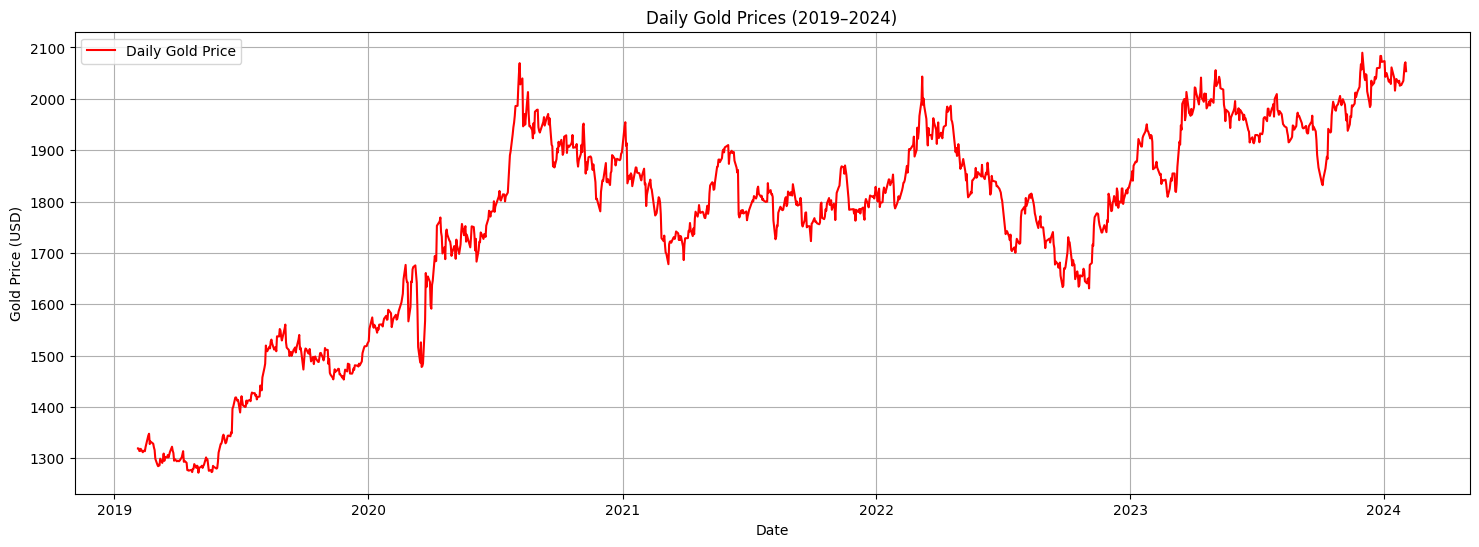

In [115]:
df_gold_price['Gold_Price'] = df_gold_price['Gold_Price'].str.replace(',', '')
df_gold_price['Gold_Price'] = pd.to_numeric(df_gold_price['Gold_Price'], errors='coerce')

df_gold_price.set_index('Date', inplace=True)

plt.figure(figsize=(18,6))
plt.plot(df_gold_price['Gold_Price'], label='Daily Gold Price', color='red')
plt.title('Daily Gold Prices (2019–2024)')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


#📈 Second Dataset
This dataset contains detailed monthly unemployment rates in the US, segmented by age, education level, gender, and ethnicity.

Data source is available here 👉 [**USA Unemployment Rates by Demographics & Race**](https://www.kaggle.com/datasets/asaniczka/unemployment-rates-by-demographics-1978-2023)  
It includes over 120 demographic columns, but for this project, we will primarily focus on the overall unemployment rate (all), which reflects the general labor market condition and will be used in our correlation analysis with gold prices.

In [117]:
filename = "unemployment_usa.csv"
df_unemployment_usa = pd.read_csv(join(path_prefix, filename))
df_unemployment_usa['date'] = pd.to_datetime(df_unemployment_usa['date'], format='%d/%m/%Y')
df_unemployment_usa.head()

,date,all,16-24,25-54,55-64,65+,less_than_hs,high_school,some_college,bachelor's_degree,...,white_men_16-24,white_men_25-54,white_men_55-64,white_men_65+,white_men_less_than_hs,white_men_high_school,white_men_some_college,white_men_bachelor's_degree,white_men_advanced_degree,population_over_16
0,2023-07-01,3.6,7.8,3.1,2.4,2.7,7.0,4.8,3.4,2.4,...,7.0,2.5,2.1,2.4,7.0,3.8,2.8,2.1,1.6,267002000
1,2023-06-01,3.6,7.8,3.1,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,7.0,3.8,2.9,2.1,1.6,266801000
2,2023-05-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.1,2.5,6.9,3.8,2.9,2.1,1.6,266618000
3,2023-04-01,3.6,7.9,3.0,2.4,2.8,7.1,4.8,3.4,2.4,...,7.0,2.5,2.2,2.5,6.9,3.8,2.9,2.1,1.6,266443000
4,2023-03-01,3.6,8.0,3.0,2.5,2.8,7.1,4.8,3.5,2.4,...,7.1,2.5,2.2,2.5,6.8,3.9,2.9,2.1,1.7,266272000


In [118]:
print(df_unemployment_usa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Columns: 122 entries, date to population_over_16
dtypes: datetime64[ns](1), float64(120), int64(1)
memory usage: 511.0 KB
None


In [119]:
print(df_unemployment_usa.describe())

                                date         all       16-24       25-54  \
count                            536  536.000000  536.000000  536.000000   
mean   2001-03-17 00:21:29.552238848    6.160261   12.558769    5.090672   
min              1978-12-01 00:00:00    3.600000    7.800000    3.000000   
25%              1990-01-24 06:00:00    4.900000   10.800000    4.100000   
50%              2001-03-16 12:00:00    5.800000   12.100000    4.700000   
75%              2012-05-08 18:00:00    7.300000   14.000000    5.900000   
max              2023-07-01 00:00:00   10.300000   18.700000    8.700000   
std                              NaN    1.633552    2.596647    1.470262   

            55-64         65+  less_than_hs  high_school  some_college  \
count  536.000000  536.000000    536.000000   536.000000    536.000000   
mean     3.972388    3.779291     12.366978     6.896455      5.350373   
min      2.400000    2.400000      7.000000     4.300000      3.100000   
25%      3.100000  

To ensure temporal alignment between the two datasets, we extract unemployment data starting from the year 2020 onward, as our gold price dataset covers this same period.
We first convert the date column into datetime format and then isolate the year. Finally, we filter the dataframe to retain only the relevant columns (date, year, and all) and keep only records from 2020 and later, which enables a fair and synchronized comparison.

In [120]:
df_unemployment_usa['year'] = pd.to_datetime(df_unemployment_usa['date']).dt.year
df_unemployment_usa = df_unemployment_usa[['date','year','all']]
df_unemployment_usa = df_unemployment_usa[df_unemployment_usa['year']>=2019]
df_unemployment_usa.head()

,date,year,all
0,2023-07-01,2023,3.6
1,2023-06-01,2023,3.6
2,2023-05-01,2023,3.6
3,2023-04-01,2023,3.6
4,2023-03-01,2023,3.6


In [121]:
print(df_unemployment_usa.info())

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    55 non-null     datetime64[ns]
 1   year    55 non-null     int32         
 2   all     55 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 1.5 KB
None


#📆 Converting to Monthly Frequency
To ensure consistency in temporal granularity between the two datasets, I decided to resample the US Stock Market dataset from daily to monthly frequency, matching the structure of the US Unemployment Rate dataset.
By aligning the time intervals, we enable a more accurate and meaningful comparison during correlation analysis.

In [123]:
monthly_gold_price = df_gold_price.resample('MS').first()
monthly_gold_price.reset_index(inplace=True)
monthly_gold_price.head()


,Date,Gold_Price
0,2019-02-01,1319.3
1,2019-03-01,1299.2
2,2019-04-01,1294.2
3,2019-05-01,1284.2
4,2019-06-01,1327.9


# 🪙Gold Prices Over Time

**📈 Monthly Gold Price Visualization**

In this step, we visualize the monthly average gold prices using a clean and customized line plot.

To achieve this:

-We first remove comma separators from the Gold_Price values and convert them to float type for accurate plotting.

-A reusable plotting function (_plot_series) is defined to handle styling and color assignment using Seaborn's Dark2 palette.

-The data is sorted by Date to ensure chronological order.

-Finally, the gold price trend is plotted using matplotlib, with improved aesthetics via Seaborn's despine() function.

This visualization provides a clear overview of how gold prices have evolved month by month, and serves as a foundation for further comparative analysis.

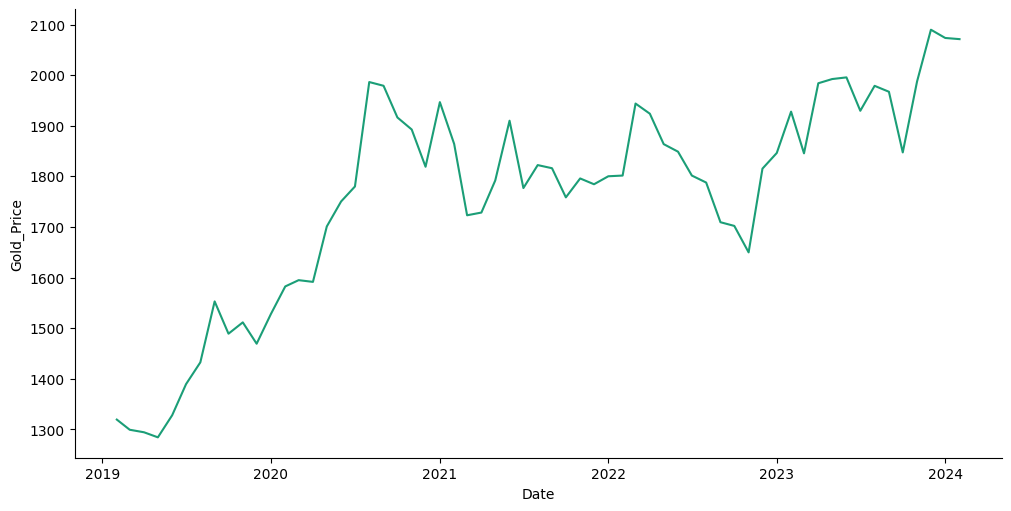

In [124]:
from matplotlib import pyplot as plt
import seaborn as sns

monthly_gold_price['Gold_Price'] = monthly_gold_price['Gold_Price'].apply(
    lambda x: float(str(x).replace(',', '')) if isinstance(x, str) else x
)

def _plot_series(series,series_name,series_index=0):
  palette = list(sns.color_palette('Dark2'))
  xs = series['Date']
  ys = series['Gold_Price']
  plt.plot(xs,ys,label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10,5), layout ='constrained')
df_sorted= monthly_gold_price.sort_values('Date',ascending=True)
_plot_series(df_sorted,'')
sns.despine(fig=fig,ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Gold_Price')

#🧪 NaN Value Check
We check for the presence of missing (NaN) values in the dataset.
If any are found, they would be filled using the average of the preceding and following values to maintain continuity.
However, since no NaN values are present, no further imputation or data adjustment is necessary at this stage.

In [125]:
missing_percentage_gold_price = monthly_gold_price.isnull().mean() * 100
print("Percentage of missing values in monthly_gold_price:")
print(missing_percentage_gold_price)

Percentage of missing values in monthly_gold_price:
Date          0.0
Gold_Price    0.0
dtype: float64


In [126]:
missing_percentage_unemployment_usa = df_unemployment_usa.isnull().mean() * 100
print("Percentage of missing values in monthly_unemployment_usa:")
print(missing_percentage_unemployment_usa)

Percentage of missing values in monthly_unemployment_usa:
date    0.0
year    0.0
all     0.0
dtype: float64


#📊 Scatter Plot: Gold Price vs. Unemployment Rate
In this step, we create a scatter plot to visually compare the monthly gold prices and unemployment rates over time.

We convert the unemployment dataset’s date column to datetime format to ensure compatibility with the gold price dataset.

Two scatter plots are drawn:

Gold Price values are shown in blue.

Unemployment Rate values are shown in red.

Both datasets are plotted against time (Date) on the x-axis for a side-by-side temporal comparison.

This visualization allows us to observe whether any visible pattern or inverse trend exists between gold prices and unemployment rates during the same periods. It helps lay the foundation for further correlation analysis.

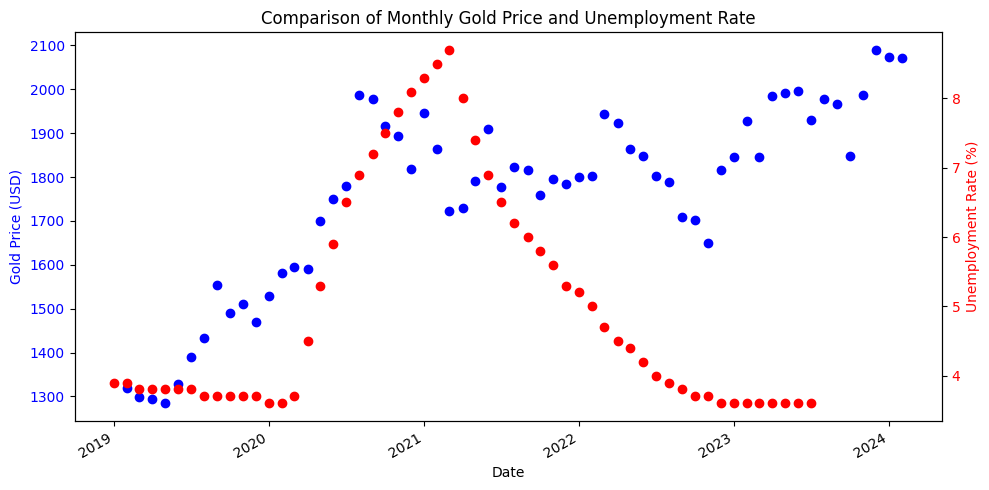

In [129]:
monthly_gold_price['Date'] = pd.to_datetime(monthly_gold_price['Date']).dt.normalize()
df_unemployment_usa['date'] = pd.to_datetime(df_unemployment_usa['date'], dayfirst=True).dt.normalize()
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.scatter(monthly_gold_price['Date'], monthly_gold_price['Gold_Price'], color='blue', label='Gold Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.scatter(df_unemployment_usa['date'], df_unemployment_usa['all'], color='red', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Comparison of Monthly Gold Price and Unemployment Rate')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()




#⚖️ Scaling the Data for Comparison
In order to enable a meaningful comparison between gold prices and unemployment rates, both datasets are scaled to a common range using Min-Max normalization.

🔹 **Why Scaling?**
-Gold prices and unemployment rates are on very different scales (e.g., 1300–2100 vs. 3–10).

-Plotting them together or applying statistical measures like correlation would be misleading without scaling.

-Min-Max scaling compresses all values to the range [0, 1], preserving the original trends.

🛠️ **What We Did:**

-Monthly Aggregation:
We group the unemployment dataset by date and calculate the sum for the 'all' column (total unemployment rate for each month).

-Min-Max Normalization:
We use MinMaxScaler from sklearn.preprocessing to rescale:

The Gold_Price column in the monthly_gold_price DataFrame

The all column in the aggregated unemployment DataFrame

This transformation allows us to visualize and compare the dynamics of gold prices and unemployment rates on the same scale.

In [130]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
monthly_gold_price[['Gold_Price']] = scaler.fit_transform(monthly_gold_price[['Gold_Price']])
df_unemployment_usa['all'] = scaler.fit_transform(df_unemployment_usa[['all']])
monthly_gold_price.head()

,Date,Gold_Price
0,2019-02-01,0.043575
1,2019-03-01,0.018622
2,2019-04-01,0.012415
3,2019-05-01,0.000000
4,2019-06-01,0.054252


In [165]:
total_unemployment_per_month = df_unemployment_usa.groupby('date')['all'].sum().reset_index()
total_unemployment_per_month['all']= scaler.fit_transform(total_unemployment_per_month[['all']])
total_unemployment_per_month.head()

,date,all
0,2019-01-01,0.058824
1,2019-02-01,0.058824
2,2019-03-01,0.039216
3,2019-04-01,0.039216
4,2019-05-01,0.039216


#📊 Scatter Plot: Normalized Monthly Gold Price vs. Unemployment Rate
In this step, we create a scatter plot to compare the normalized monthly gold prices and normalized unemployment rates over time.

🛠️ **What this plot shows:**
Both datasets were scaled using Min-Max normalization so that their values range between 0 and 1.

This ensures both variables can be plotted on the same y-axis without being distorted by their original value ranges.

🎯 **Purpose:**
This visualization helps us observe whether the two variables show any visible correlation or inverse pattern across time.
For instance, we may be able to visually detect whether increases in gold prices correspond to increases or decreases in unemployment rates.

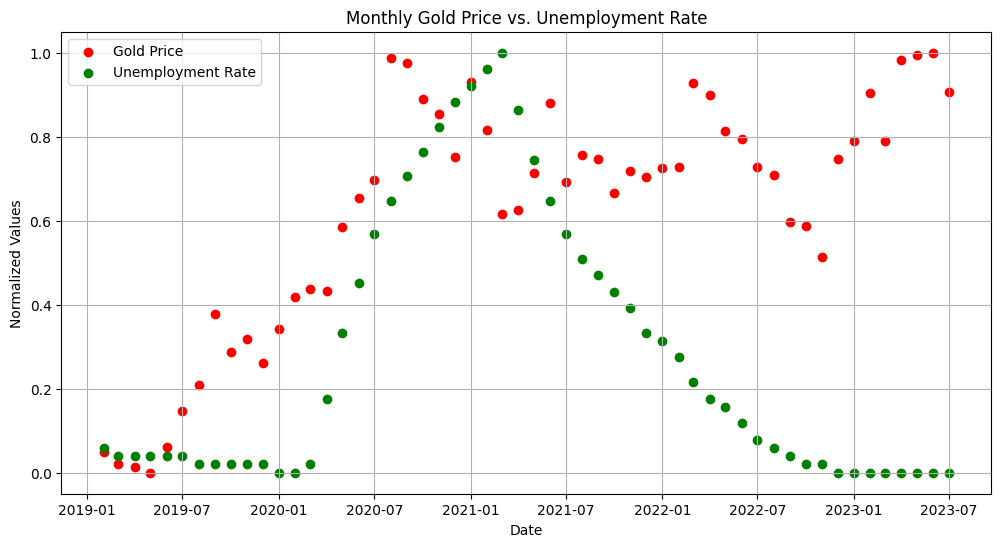

In [166]:
from sklearn.preprocessing import MinMaxScaler


gold_df = monthly_gold_price[['Date', 'Gold_Price']].copy()
unemp_df = total_unemployment_per_month[['date', 'all']].copy()
unemp_df.rename(columns={'date': 'Date', 'all': 'Unemployment_Rate'}, inplace=True)


gold_df['Date'] = pd.to_datetime(gold_df['Date']).dt.to_period('M').dt.to_timestamp()
unemp_df['Date'] = pd.to_datetime(unemp_df['Date']).dt.to_period('M').dt.to_timestamp()


scaler = MinMaxScaler()

gold_df['Gold_Price_Norm'] = scaler.fit_transform(gold_df[['Gold_Price']])
unemp_df['Unemployment_Norm'] = scaler.fit_transform(unemp_df[['Unemployment_Rate']])


merged = pd.merge(gold_df[['Date', 'Gold_Price_Norm']], unemp_df[['Date', 'Unemployment_Norm']], on='Date', how='inner')


plt.figure(figsize=(12,6))
plt.scatter(merged['Date'], merged['Gold_Price_Norm'], color='red', label='Gold Price')
plt.scatter(merged['Date'], merged['Unemployment_Norm'], color='green', label='Unemployment Rate')
plt.title('Monthly Gold Price vs. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid(True)
plt.show()


#📊 Hypothesis Testing: Impact of Gold Prices on Unemployment Rates
In this section, we aim to test whether monthly gold prices have a statistically significant impact on unemployment rates in the United States using hypothesis testing and correlation analysis.

🧪 **Hypothesis Definition**

Null Hypothesis (H₀):
There is a strong correlation between monthly gold prices and unemployment rates.

Alternative Hypothesis (H₁):
There is no correlation between monthly gold prices and unemployment rates.

We will use Pearson correlation coefficient to test the relationship.

#🔄 Data Preparation and Merging
Before performing hypothesis testing, we first prepared and aligned the gold price and unemployment datasets to ensure consistency in our analysis. Both datasets contain monthly data but use different column names and formats, so the following steps were taken:

**Column Renaming:**
To standardize column names, we renamed date to Date and all to Unemployment_Rate in the unemployment dataset. This improves readability and allows seamless merging with the gold price dataset.

**Data Merging:**
After renaming, we merged the monthly_gold_price and total_unemployment_per_month DataFrames on the common Date column using an inner join. This ensures that only the records with matching dates in both datasets are included.

In [167]:
total_unemployment_per_month.rename(columns={'date':'Date'}, inplace = True)
total_unemployment_per_month.rename(columns={'all':'Unemployment_Rate'}, inplace = True)
merged_data = pd.merge(monthly_gold_price, total_unemployment_per_month, on='Date', how='inner')
merged_data.head()



,Date,Gold_Price,predicted_rate,Unemployment_Rate
0,2019-02-01,0.043575,0.018251,0.058824
1,2019-03-01,0.018622,0.005488,0.039216
2,2019-04-01,0.012415,0.002313,0.039216
3,2019-05-01,0.000000,-0.004037,0.039216
4,2019-06-01,0.054252,0.023712,0.039216


In [168]:
from scipy.stats import pearsonr
corr_price_unemployment, p_value_price_unemployment = pearsonr(merged_data['Gold_Price'], merged_data['Unemployment_Rate'])
print("Correlation coefficient between price and unemployment rate:", corr_price_unemployment)
print("P-value (Price vs. Unemployment Rate):", p_value_price_unemployment)

Correlation coefficient between price and unemployment rate: 0.401607984286006
P-value (Price vs. Unemployment Rate): 0.0026126176081895706


The correlation coefficient between gold prices and unemployment rates is 0.401. This coefficient shows a moderate positive correlation between prices and rates. When gold prices increase, there exists a moderate increase in unemployment rates.
P-value is 0.002. This value is considered as statistically significant since it is less than 0.5. This leads to rejection of the null hypothesis. So as a result, we can say that there is no correlation between gold prices and unemployment rates.

# 🔬T-Test
Null Hypothesis (H0): There is no difference in the mean rate of unemployment between monthly high gold prices and low gold prices.
Alternative Hypothesis (H1): There is a difference in the mean rate of unemployment between monthly high gold prices and low gold prices.

In [169]:
from scipy.stats import ttest_ind
median_price= merged_data['Gold_Price'].median()
highprice= merged_data[merged_data['Gold_Price']> median_price]['Unemployment_Rate']
lowprice = merged_data[merged_data['Gold_Price']<= median_price]['Unemployment_Rate']
tstat, pvalue= ttest_ind(highprice,lowprice,equal_var=False)
print("T-Statistic:", tstat)
print("P Value:",pvalue)

T-Statistic: 1.9824941529992777
P Value: 0.05293881082384262


The value of T-Statistic is 1.982. This shows that there is a difference in the mean of high and low gold prices, however it doesn't seem like a large difference.
P value of the given groups is 0.052. Since the value is greater than 0.05 we can say that the difference in the mean rates of unemployment is not statistically significant between monthly high and low gold prices.
Based on the test, we can not reject the null hypothesis. But we can say that there is no significant effect of gold prices on unemployment rates.

#📈Linear Regression
In this section, a linear regression model is used to examine the effect of gold prices on unemployment rates. The independent variable is Gold_Price, and the dependent variable is Unemployment_Rate. The key results from the model are as follows:

R-squared: 0.161 — This indicates that gold prices explain approximately 16% of the variation in unemployment rates. This suggests a weak explanatory power.

P-value (Gold_Price): 0.003 — Since this value is less than 0.05, it is statistically significant. This means the relationship between gold prices and unemployment rates is not due to random chance.

Coefficient (Gold_Price): 0.5115 — This implies that for every one-unit increase in gold prices, the unemployment rate increases by approximately 0.51 units.

Conclusion:
Although the model is statistically significant, its explanatory power is relatively low. This indicates that there is a statistically significant but weak positive relationship between gold prices and unemployment rates.

In [170]:
import statsmodels.api as sm
X= sm.add_constant(merged_data['Gold_Price'])
Y= merged_data['Unemployment_Rate']
model= sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Unemployment_Rate   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     10.00
Date:                Mon, 28 Jul 2025   Prob (F-statistic):            0.00261
Time:                        12:45:30   Log-Likelihood:                -10.202
No. Observations:                  54   AIC:                             24.40
Df Residuals:                      52   BIC:                             28.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.098     -0.041      0.9

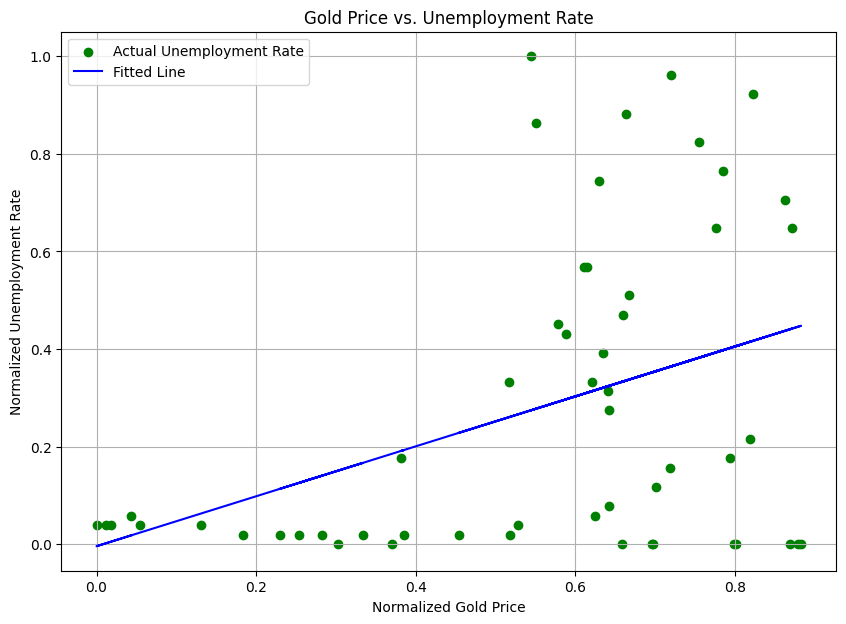

In [172]:
import statsmodels.api as sm


X = sm.add_constant(merged_data['Gold_Price'])
Y = merged_data['Unemployment_Rate']


model = sm.OLS(Y, X).fit()


merged_data['predicted_rate'] = model.predict(X)


plt.figure(figsize=(10,7))
plt.scatter(merged_data['Gold_Price'], merged_data['Unemployment_Rate'], color='green', label='Actual Unemployment Rate')
plt.plot(merged_data['Gold_Price'], merged_data['predicted_rate'], color='blue', label='Fitted Line')
plt.title('Gold Price vs. Unemployment Rate')
plt.xlabel('Normalized Gold Price')
plt.ylabel('Normalized Unemployment Rate')
plt.legend()
plt.grid(True)
plt.show()


**Conclusion:**
The regression analysis suggests a moderate potential influence of gold prices on unemployment rates, but the lack of statistical significance means we cannot confidently assert a meaningful relationship based on this model.

# 🧠Machine Learning
To evaluate the predictive power of machine learning models on the relationship between gold prices and unemployment rates, we applied two regression techniques: Random Forest Regressor and K-Nearest Neighbors (KNN).

🔍 **Evaluation Metric:** RMSE (Root Mean Squared Error)
We used RMSE to measure the performance of each model. Since the input features were normalized, RMSE provided a consistent and interpretable comparison metric.

In [173]:
merged_data

,Date,Gold_Price,predicted_rate,Unemployment_Rate
0,2019-02-01,0.043575,0.018251,0.058824
1,2019-03-01,0.018622,0.005488,0.039216
2,2019-04-01,0.012415,0.002313,0.039216
3,2019-05-01,0.000000,-0.004037,0.039216
4,2019-06-01,0.054252,0.023712,0.039216
5,2019-07-01,0.130478,0.062701,0.039216
6,2019-08-01,0.183985,0.090070,0.019608
7,2019-09-01,0.333457,0.166524,0.019608
8,2019-10-01,0.254252,0.126011,0.019608
9,2019-11-01,0.282061,0.140235,0.019608


In [196]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
A= merged_data['Unemployment_Rate']
B= merged_data['Gold_Price']
A_train,A_test,B_train,B_test= train_test_split(A,B,test_size=0.2,random_state=36)

# 🌲Random Forest Regressor
The Random Forest model was trained with 100 estimators.

After fitting the model, we achieved an RMSE of 0.261 on the test set.

This indicates a decent fit but leaves room for improvement.

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100)
A_train=A_train.values.reshape(-1,1)
A_test=A_test.values.reshape(-1,1)
rf.fit(A_train, B_train)
rf_predict= rf.predict(A_test)
mse = mean_squared_error(B_test, rf_predict)
rmse = np.sqrt(mse)
print(f'Random Forest Root Mean Squared Error: {rmse}')

Random Forest Root Mean Squared Error: 0.2613783528708696


# 👥K-Nearest Neighbors (KNN)
The KNN model used 10 neighbors.

After training, it yielded a lower RMSE of 0.205, outperforming the Random Forest model.

The lower error suggests that KNN better captures the underlying pattern in this specific dataset.

In [203]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor(n_neighbors=10)
knn.fit(A_train,B_train)
knn_predict = knn.predict(A_test)
knnmse = mean_squared_error(B_test, knn_predict)
krmse = np.sqrt(knnmse)
print(f'kNN Root Mean Square Error: {krmse}')


kNN Root Mean Square Error: 0.20570356737877923


**Conclusion:**
Even though both models perform reasonably well, KNN outperforms Random Forest in terms of RMSE for this dataset. Thus, KNN is considered the more effective model for predicting unemployment rates based on gold prices.

#📌 Overall Conclusion
In this project, we explored the relationship between gold prices and unemployment rates through statistical analysis and machine learning models. Our findings suggest a moderate positive correlation between the two variables, and the results were supported by both linear regression and machine learning techniques. Among the tested models, K-Nearest Neighbors demonstrated the best performance. Overall, the study highlights how financial indicators like gold prices can offer meaningful insights into economic factors such as unemployment.